#  Project 2: Harris Corner Detection and Matching

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from utils import plotFigureGray, plotFigure
from student_code import harris_corners, get_keypoints, get_features

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Open Two images for matching. Convert them into grayscale
### Take two similar images and add the photos to folder data. Rename these images as img1.jpg, and img2.jpg

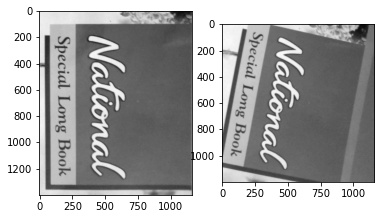

In [37]:
img1_orig = cv2.imread('../data/custom.jpg')[1500:2900,3000:]#[1200:3100,900:2200]
img2_orig = cv2.imread('../data/custom_rotated.jpg')[1800:3000,3000:]#[1200:3000,:]#[1800:3000,3000:]
#img3_orig = cv2.imread('../data/parrot.png')

img1= np.float32(cv2.cvtColor(img1_orig,cv2.COLOR_BGR2GRAY))
img2= np.float32(cv2.cvtColor(img2_orig,cv2.COLOR_BGR2GRAY))
#img3= np.float32(cv2.cvtColor(img3_orig,cv2.COLOR_BGR2GRAY))

plt.subplot(121)
plt.imshow(img1,'gray')
plt.subplot(122)
plt.imshow(img2,'gray')

# Get Harris Corners, normalize the corner values between 0 and 255. 

255


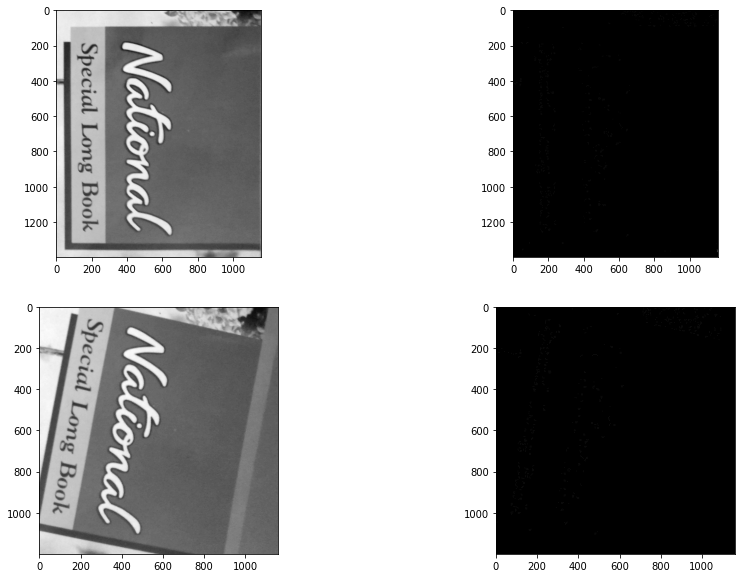

In [38]:
corners1, corners11, Ix1, Iy1 = harris_corners(img1, sigma=5, window_size=11, alpha=0.04, threshold=1e-3, nms_size=5)
corners2, corners22, Ix2, Iy2 = harris_corners(img2, sigma=5, window_size=11, alpha=0.04, threshold=1e-3, nms_size=5)

corners1 = cv2.normalize(corners1, corners1, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
corners2 = cv2.normalize(corners2, corners2, alpha=0, beta=255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

print(np.max(corners1))
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(img1,'gray')
plt.subplot(222)
plt.imshow(corners11,'gray')
plt.subplot(223)
plt.imshow(img2,'gray')
plt.subplot(224)
plt.imshow(corners22,'gray')

# Set the threshold for corners and generate key points from these corners

In [50]:
threshold = 30
diameter = 3
kp1 = get_keypoints(corners1, Ix1, Iy1, threshold, diameter)
kp2 = get_keypoints(corners2, Ix2, Iy2, threshold, diameter)

# Draw the key points. The line (radius) depicts the gradient

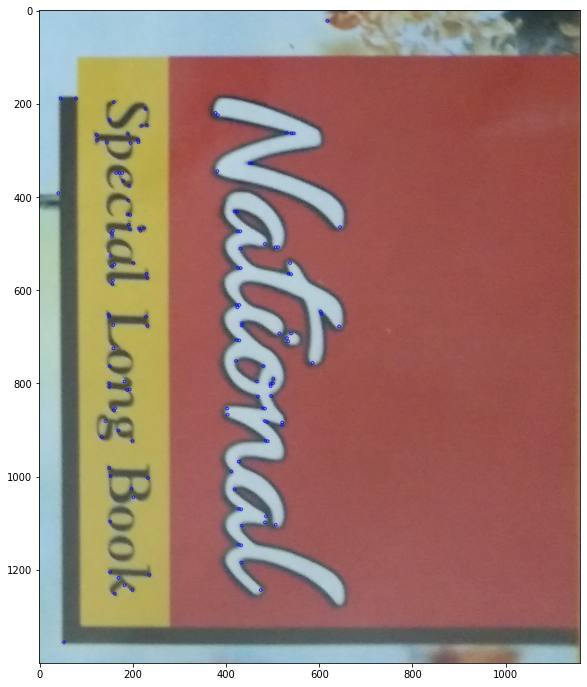

In [51]:
cv2.drawKeypoints(img1_orig, kp1, img1_orig, color=(255,0,0))
                         
plotFigure(img1_orig,12)
plt.show()   

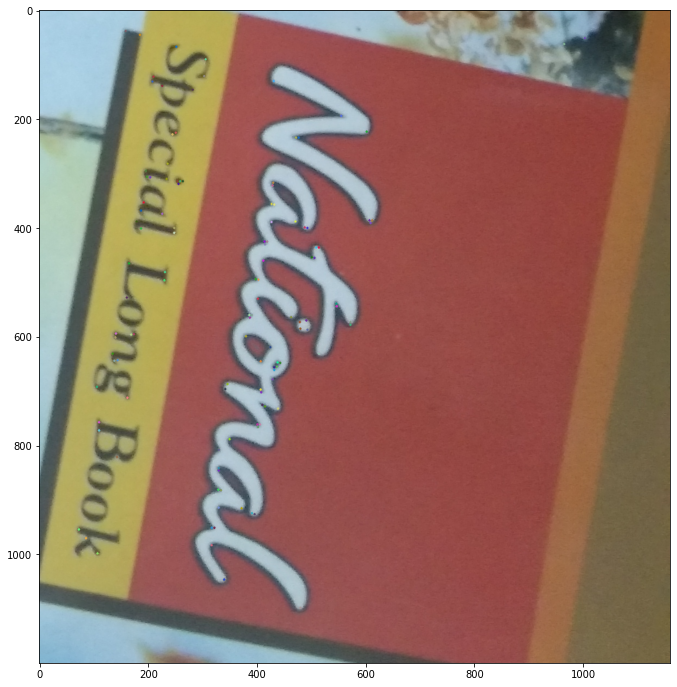

In [52]:
cv2.drawKeypoints(img2_orig, kp2, img2_orig,
                          flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plotFigure(img2_orig,12)
plt.show()   

# From these key points, generate ORB descriptors. Then match these descriptors



In [53]:
orb = cv2.ORB_create()

# create sift instance
# sift = cv2.xfeatures2d.SIFT_create()
# get descriptors
descriptors1 = orb.compute(img1_orig, kp1)[1]
descriptors2 = orb.compute(img2_orig, kp2)[1]

In [54]:
print(descriptors1)

[[185 186 239 ... 136 240 249]
 [142  80  52 ...  55  45 215]
 [ 10  17  48 ...  14  45 223]
 ...
 [130  94  22 ... 116 173 143]
 [ 27  95  98 ... 252 248 252]
 [  6  81  50 ...  55  45 215]]


In [55]:

# get matches
bfm = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bfm.match(descriptors1, descriptors2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = np.array([])

img3 = cv2.drawMatches(img1_orig,kp1,img2_orig,kp2,matches[:10], img3, flags=2)



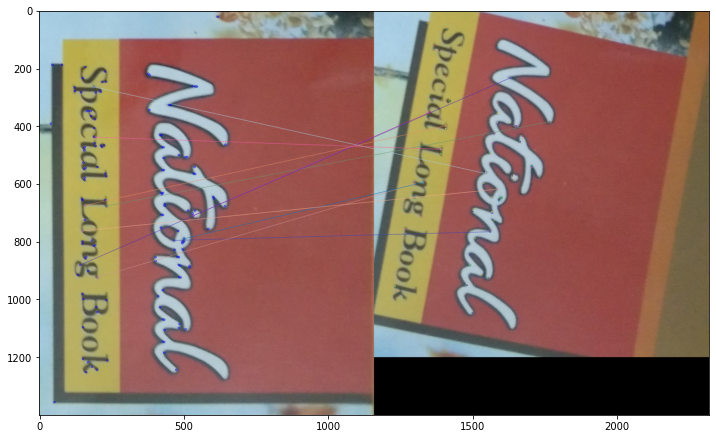

True

In [56]:
plotFigure(img3,12)
plt.show() 
cv2.imwrite('../results/matched_custom.png', img3)


## Custom SIFT descriptor

In [57]:
import math

In [58]:
descriptors1 = get_features(img1, kp=kp1, feature_width=64)
descriptors2 = get_features(img2, kp=kp2, feature_width=64)

window =  (64, 64)
ori_single =  (64, 64)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
window =  (64, 64)
ori_single =  (64, 64)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
window =  (64, 64)
ori_single =  (64, 64)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15, 15)
subsets =  (15

In [59]:
descriptors1 = np.float32(descriptors1)
descriptors2 = np.float32(descriptors2)

# get matches
bfm = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bfm.match(descriptors1, descriptors2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = np.array([])

img3 = cv2.drawMatches(img1_orig,kp1,img2_orig,kp2,matches[:10], img3, flags=2)





<Figure size 1080x720 with 0 Axes>

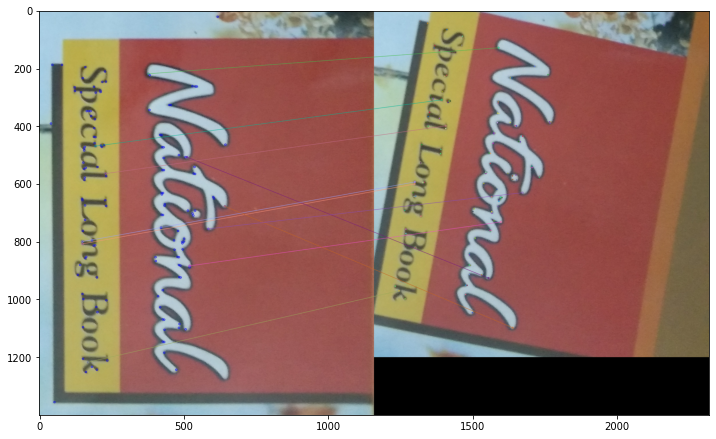

True

In [60]:
plt.figure(figsize=(15,10))
plotFigure(img3,12)
plt.show() 
cv2.imwrite('../results/matched_custom_SIFT.png', img3)
